<a href="https://colab.research.google.com/github/Leonel-Ariel-Ruppel/READ-ME/blob/main/Maestr%C3%ADa_Redes_Neuronales_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implementación de Red Neuronal Convolucional (CNN) en Python

Las redes neuronales convolucionales pueden tener decenas o cientos de capas, y cada una de ellas aprende a detectar diferentes características de una imagen. Se aplican filtros a las imágenes de entrenamiento con distintas resoluciones, y la salida resultante de convolucionar cada imagen se emplea como entrada para la siguiente capa.

Estas capas realizan operaciones que modifican los datos, con el propósito de comprender sus características particulares. Las 3 capas más comunes son: convolución, activación o ReLU, y agrupación (pooling).

1. Convolución: Aplica un conjunto de filtros convolucionales a las imágenes de
entrada; cada filtro activa diferentes características de las imágenes.

2. Unidad lineal rectificada (ReLU): Mantiene los valores positivos y establece los valores negativos en cero, lo que permite un entrenamiento más rápido y eficaz. También se lo conoce como activación, ya que solo las características activadas prosiguen a la siguiente capa.

3. Agrupación (pooling): Simplifica la salida mediante reducción no lineal de la tasa de muestreo, lo que disminuye el número de parámetros que la red debe aprender.
Estas operaciones se repiten en decenas o cientos de capas; cada capa aprende a identificar diferentes características.





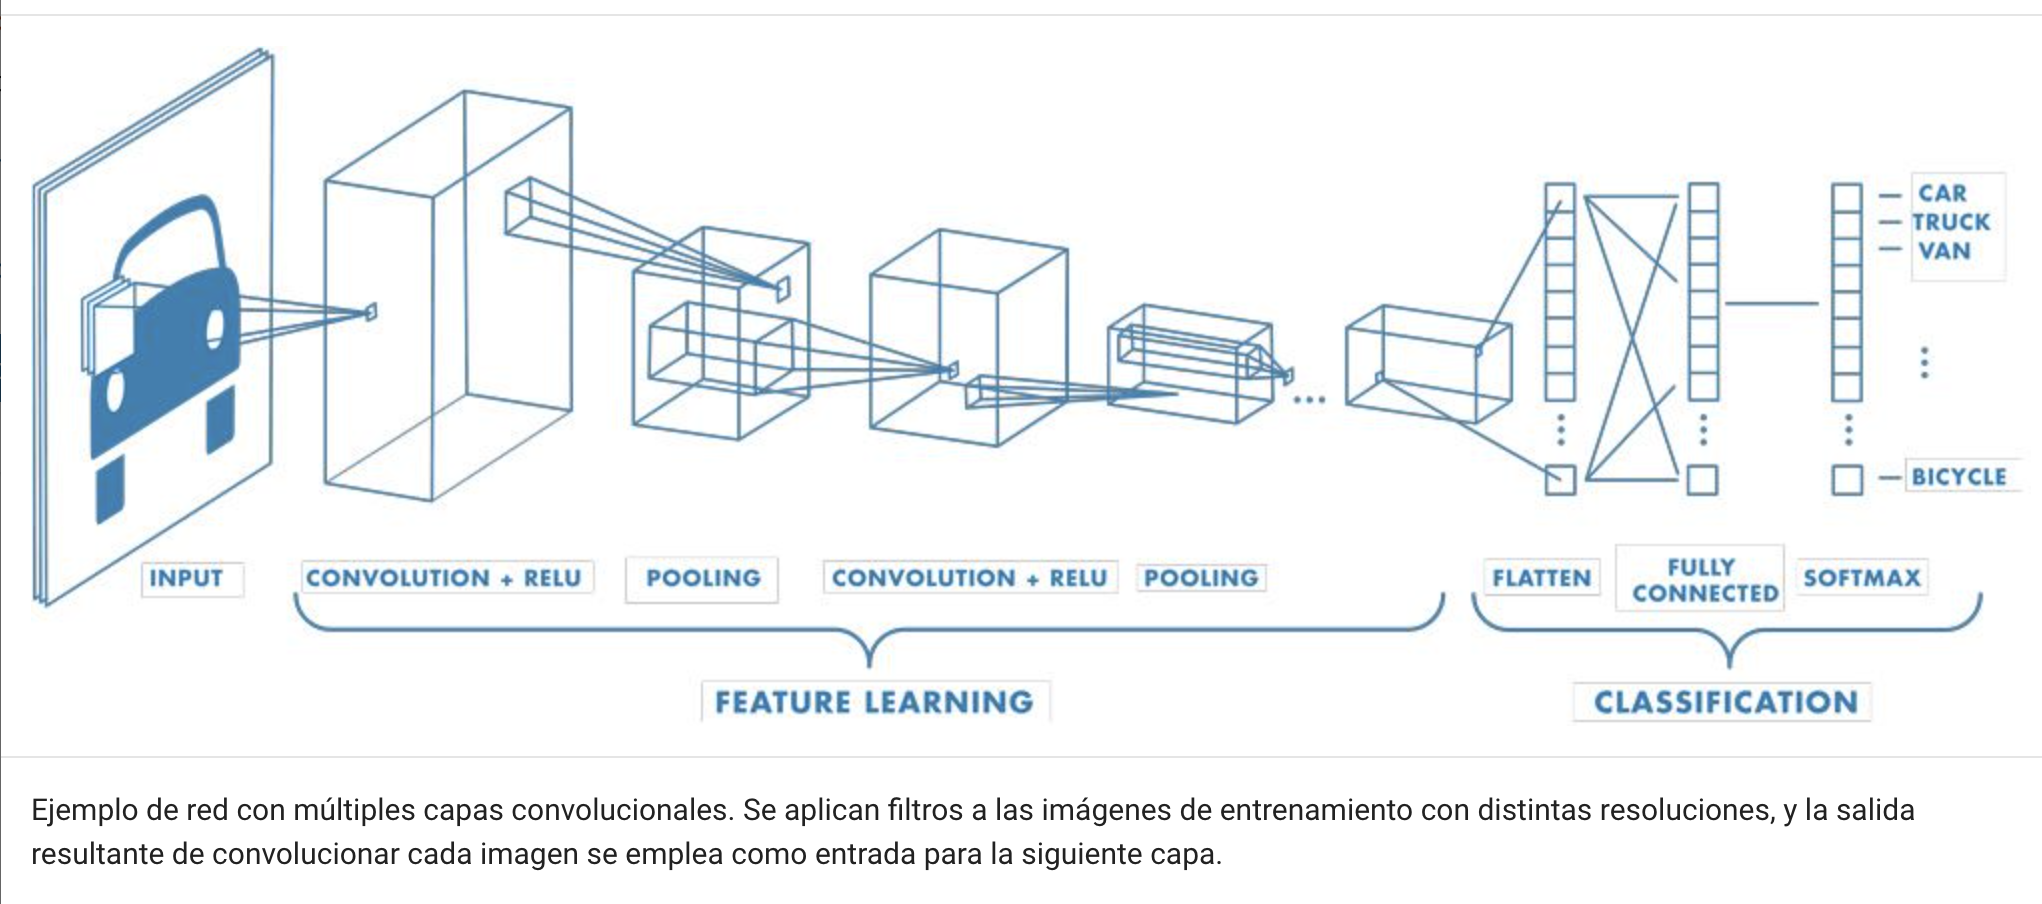

###Pesos y sesgos compartidos
A diferencia de una red neuronal tradicional, una CNN tiene pesos y valores de sesgos compartidos, que son los mismos para todas las neuronas ocultas de una capa determinada. Esto significa que todas las neuronas ocultas detectan las mismas características, tales como bordes o formas, en diferentes regiones de la imagen. Esto hace que la red sea tolerante a la traducción de objetos de una imagen. Por ejemplo, una red entrenada para reconocer automóviles podrá hacerlo independientemente de dónde aparezca el automóvil en la imagen.

###Capas de clasificación
Después de aprender características en muchas capas, la arquitectura de una CNN pasa a la clasificación.
La penúltima capa está completamente conectada y genera un vector de K dimensiones, donde K es el número de clases que se pueden predecir, y contiene las probabilidades para cada clase de una imagen que se está clasificando.
La capa final de la arquitectura de la CNN utiliza una capa de clasificación para proporcionar la salida de clasificación final.

En el siguiente ejercicio vamos a entrenar una CNN para clasificar un set de imágenes.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

El conjunto de datos CIFAR10 contiene 60.000 imágenes en color divididas en 10 clases, con 6.000 imágenes en cada clase.
El conjunto de datos se divide en 50.000 imágenes de entrenamiento y 10.000 imágenes de test. Las clases son mutuamente excluyentes y no hay superposición entre ellas.
El batch de test contiene exactamente 1.000 imágenes seleccionadas al azar de cada clase. Los batches de entrenamiento contienen las imágenes restantes en orden aleatorio, pero algunos batches de entrenamiento pueden contener más imágenes de una clase que de otra. Entre todos los batches de entrenamiento, contienen exactamente 5.000 imágenes de cada clase.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1.  Generalmente los valores de pixel van de 0 a 255
train_images, test_images = train_images / 255.0, test_images / 255.0

Traemos las primeras 25 imágenes del conjunto de entrenamiento y mostramos el nombre de la clase debajo de cada imagen:

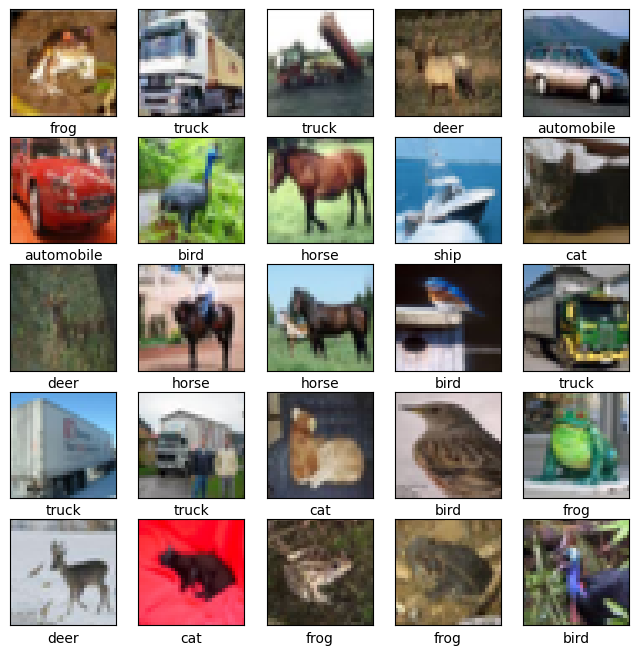

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Creamos la CNN basada en Conv2D y MaxPooling2D.  Como input usamos la altura de la imagen, el ancho de la imagen y el canal de colores (R, G, B).  En este caso, el input_shape es (32, 32, 3) que corresponde al formato de las imágenes utilizadas.   

In [ ]:
model = models.Sequential()
#he_uniform implica un peso inicial aleatorio del kernel. padding = same implica que la cantidad de output es igual a la cantidad de input.
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))

Podemos ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor de forma 3D (alto, ancho, canales). Las dimensiones de ancho y alto tienden a reducirse a medida que se profundiza en la red. El número de canales de salida para cada capa Conv2D está controlado por el primer argumento (por ejemplo, 32 o 64). Normalmente, a medida que el ancho y el alto se reducen, puede permitirse computacionalmente agregar más canales de salida en cada capa de Conv2D.

In [ ]:
model.summary()
#Number of parameters = (kernel height * kernel width * input channels + 1) * number of filters. 1 is the bias.
#(3 * 3 * 3 + 1) * 32=896
#(3 * 3 * 32 + 1) * 64=18496
#(3 * 3 * 64 + 1) * 64=36928

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

Para completar el modelo, alimentamos el último tensor de salida de la base convolucional (de forma (4, 4, 64)) en una o más capas Dense para realizar la clasificación. Las capas dense toman vectores como entrada (que son 1D), mientras que la salida actual es un tensor 3D. Primero, aplanamos la salida 3D a 1D, luego agregamos una o más capas Dense en la parte superior. CIFAR tiene 10 clases de salida, por lo que utiliza una capa Dense final con 10 salidas.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

El resumen muestra que las salidas (4, 4, 64) se aplanaron en vectores de forma (1024) antes de pasar por dos capas Dense.

Entrenamos el modelo

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #sparse cross entropy se usa cuando hay varias categorías, logits implica un score en vez de una distrib de prob.  cuando son 2 categorías se usa binary cross entropy.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4103 - accuracy: 0.4938 - val_loss: 1.1010 - val_accuracy: 0.6104
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9844 - accuracy: 0.6550 - val_loss: 0.9534 - val_accuracy: 0.6650
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8258 - accuracy: 0.7105 - val_loss: 0.8875 - val_accuracy: 0.6989
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7190 - accuracy: 0.7482 - val_loss: 0.8174 - val_accuracy: 0.7203
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6361 - accuracy: 0.7784 - val_loss: 0.8379 - val_accuracy: 0.7211
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.5673 - accuracy: 0.7990 - val_loss: 0.8517 - val_accuracy: 0.7206
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5027 - accuracy: 0.8239 - val_loss: 0.8673 -

Evaluación del modelo:

313/313 - 3s - loss: 1.0280 - accuracy: 0.7217 - 3s/epoch - 10ms/step


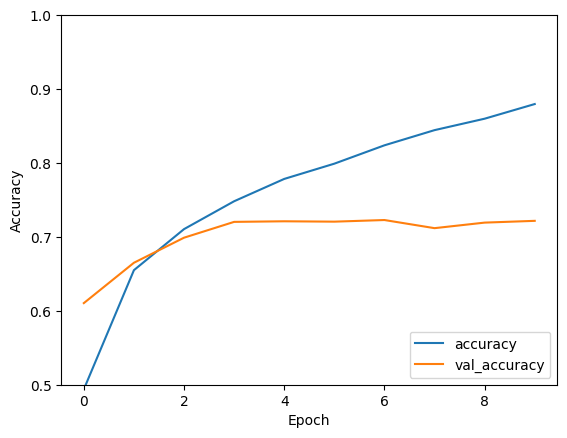

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent);

verbose=1 will show you an animated progress bar like this: [=========]

verbose=2 will just mention the number of epoch like this: Epoch 5/10

In [ ]:
print(round(test_acc,4))

0.7067


##Ejercicio de reconocimiento de imágenes



In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

Traemos un dataset de entrenamiento de 60.000 imágenes de 28x28 de 10 dígitos y un dataset de test de 10.000 imágenes.

In [ ]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


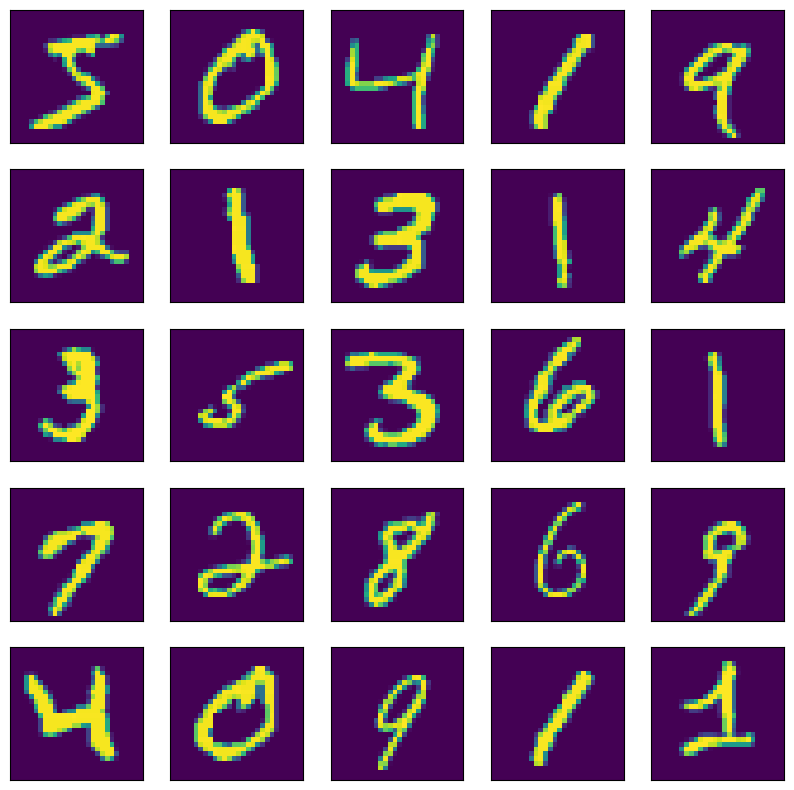

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
#reshape y le agrego el canal de color
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [ ]:
print(X_train.shape[0],X_train.shape[1],X_train.shape[2])

60000 28 28


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#normalizar los valores de pixel
X_train=X_train/255
X_test=X_test/255

In [ ]:
model=Sequential()
#agregar la capa convolucionales
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#agregar la capa de pooling
model.add(MaxPool2D(2,2))
#agregar capa fully connected
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#capa de output
model.add(Dense(10,activation='softmax')) #softmax es una función que convierte un vector en distribución de probabilidad

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.9610 - accuracy: 0.7166
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3823 - accuracy: 0.8877
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3257 - accuracy: 0.9034
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2941 - accuracy: 0.9136
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2695 - accuracy: 0.9209
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2467 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2256 - accuracy: 0.9336
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2073 - accuracy: 0.9390
Epoch 9/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1917 - accuracy: 0.9431
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1708 - accuracy: 0.9495


[0.1708100289106369, 0.9495000243186951]

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1671 - accuracy: 0.9502 - val_loss: 0.1631 - val_accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1576 - accuracy: 0.9529 - val_loss: 0.1503 - val_accuracy: 0.9548
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1494 - accuracy: 0.9545 - val_loss: 0.1464 - val_accuracy: 0.9585
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1422 - accuracy: 0.9573 - val_loss: 0.1396 - val_accuracy: 0.9603
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1352 - accuracy: 0.9595 - val_loss: 0.1373 - val_accuracy: 0.9596
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1291 - accuracy: 0.9613 - val_loss: 0.1399 - val_accuracy: 0.9577
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1239 - accuracy: 0.9627 - val_loss: 0.1264 -

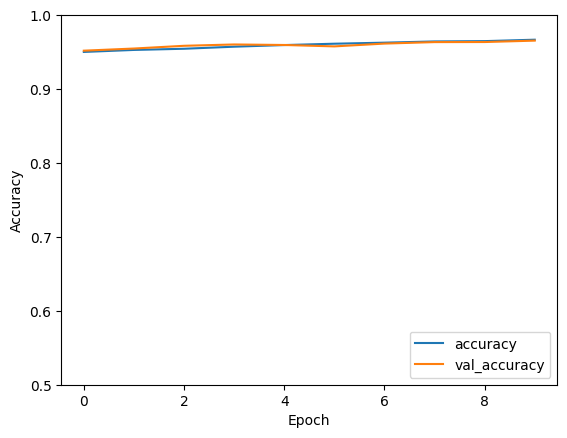

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')